In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Cars .csv")


In [3]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,NaN,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,NaN,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,NaN,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,NaN,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,NaN,6.40


In [4]:
df.shape

(5961, 15)

In [93]:
df.describe()

,Year,Kilometers_Driven,Seats,No. of Doors,Price,Mileage_Value,Engine_Value,Power_Value
count,5961.000000,5.961000e+03,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,2013.389159,5.871110e+04,5.268915,4.114933,9.528103,18.184499,1622.552995,113.434113
std,3.242507,9.165063e+04,0.788756,0.344728,11.214382,4.523880,600.830939,53.321375
min,1998.000000,1.710000e+02,2.000000,2.000000,0.440000,0.000000,72.000000,34.200000
25%,2012.000000,3.400000e+04,5.000000,4.000000,3.500000,15.260000,1198.000000,78.000000
50%,2014.000000,5.300000e+04,5.000000,4.000000,5.660000,18.180000,1493.000000,98.600000
75%,2016.000000,7.300000e+04,5.000000,4.000000,10.000000,21.100000,1984.000000,138.100000
max,2019.000000,6.500000e+06,10.000000,5.000000,160.000000,33.540000,5998.000000,560.000000


In [5]:
df.duplicated().sum()

1

In [6]:
df.isnull().sum()

Name                    0
Location               11
Year                    2
Kilometers_Driven       8
Fuel_Type               0
Transmission           27
Owner_Type             15
Mileage                 2
Engine                 17
Power                  32
Colour                 11
Seats                   5
No. of Doors            1
New_Price            5137
Price                   0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5961 non-null   object 
 1   Location           5950 non-null   object 
 2   Year               5959 non-null   float64
 3   Kilometers_Driven  5953 non-null   float64
 4   Fuel_Type          5961 non-null   object 
 5   Transmission       5934 non-null   object 
 6   Owner_Type         5946 non-null   object 
 7   Mileage            5959 non-null   object 
 8   Engine             5944 non-null   object 
 9   Power              5929 non-null   object 
 10  Colour             5950 non-null   object 
 11  Seats              5956 non-null   float64
 12  No. of Doors       5960 non-null   float64
 13  New_Price          824 non-null    object 
 14  Price              5961 non-null   float64
dtypes: float64(5), object(10)
memory usage: 698.7+ KB


In [8]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,NaN,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,NaN,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,NaN,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,NaN,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,NaN,6.40


## Spliting

In [10]:
# Split the Mileage column into numeric value and unit
df[['Mileage_Value', 'Mileage_Unit']] = df['Mileage'].str.split(' ', expand=True)

# Convert the Mileage_Value column to float
df['Mileage_Value'] = df['Mileage_Value'].astype(float)

In [11]:
df[['Engine_Value', 'Engine_Unit']] = df['Engine'].str.split(' ', expand=True)
df['Engine_Value'] = df['Engine_Value'].astype(float)

In [12]:
# Split the Power column into numeric value and unit
df[['Power_Value', 'Power_Unit']] = df['Power'].str.split(' ', expand=True)

# Replace non-numeric strings with NaN
df['Power_Value'] = pd.to_numeric(df['Power_Value'], errors='coerce')

# Convert the Power_Value column to float
df['Power_Value'] = df['Power_Value'].astype(float)

## Handling Null Values

In [14]:
df.drop(columns=['Mileage','Engine','Power'],inplace=True)

In [15]:
df.drop(columns=['New_Price'],inplace=True)

In [16]:
df['Location'].fillna(df['Location'].mode()[0],inplace=True) # filling the mode values

In [17]:
df['Year'].fillna(df['Year'].mean(),inplace=True)

In [18]:
df['Kilometers_Driven'].fillna(df['Kilometers_Driven'].mean(),inplace=True)

In [19]:
df['Transmission'].fillna(df['Transmission'].mode()[0],inplace=True)

In [20]:
df['Owner_Type'].fillna(df['Owner_Type'].mode()[0],inplace=True)

In [21]:
df['Colour'].fillna(df['Colour'].mode()[0],inplace=True)

In [22]:
df['Seats'].fillna(df['Seats'].mode()[0],inplace=True)

In [23]:
df['No. of Doors'].fillna(df['No. of Doors'].mean(),inplace=True)

In [24]:
df['Mileage_Value'].fillna(df['Mileage_Value'].mean(),inplace=True)

In [25]:
df['Mileage_Unit'].fillna(df['Mileage_Unit'].mode()[0],inplace=True)

In [26]:
df['Engine_Value'].fillna(df['Engine_Value'].mean(),inplace=True)

In [27]:
df['Engine_Unit'].fillna(df['Engine_Unit'].mode()[0],inplace=True)

In [28]:
df['Power_Value'].fillna(df['Power_Value'].mean(),inplace=True)

In [29]:
df['Power_Unit'].fillna(df['Power_Unit'].mode()[0],inplace=True)

In [30]:
# # Select only numeric columns
# numeric_df = df.select_dtypes(include='number')

# # Create the heatmap
# sns.heatmap(data=numeric_df, annot=True)

# # Show the plot
# plt.show()

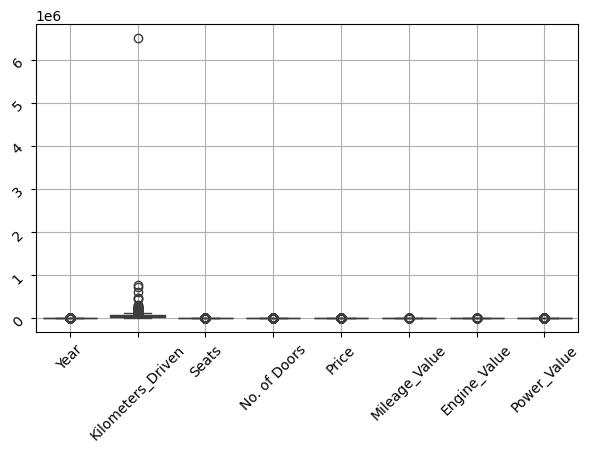

In [31]:
plt.figure(figsize=(7,4))
numeric_df = df.select_dtypes(include='number')
sns.boxplot(data=numeric_df)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(axis='y')
plt.grid(axis='x')
plt.show()

In [32]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Kilometers_Driven'].quantile(0.25)
Q3 = df['Kilometers_Driven'].quantile(0.75)
IQR = Q3 - Q1

In [33]:
# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [34]:
# Filter out outliers
df_filtered = df[(df['Kilometers_Driven'] >= lower_bound) & (df['Kilometers_Driven'] <= upper_bound)]

In [367]:
df_filtered.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Colour,Seats,No. of Doors,Price,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Power_Value,Power_Unit
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,Black/Silver,8.0,5.0,6.00,12.05,kmpl,2179.0,CC,120.0,bhp
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,Others,5.0,4.0,8.32,21.10,kmpl,998.0,CC,100.0,bhp
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,White,5.0,4.0,3.49,24.00,kmpl,1120.0,CC,70.0,bhp


## Visualisation

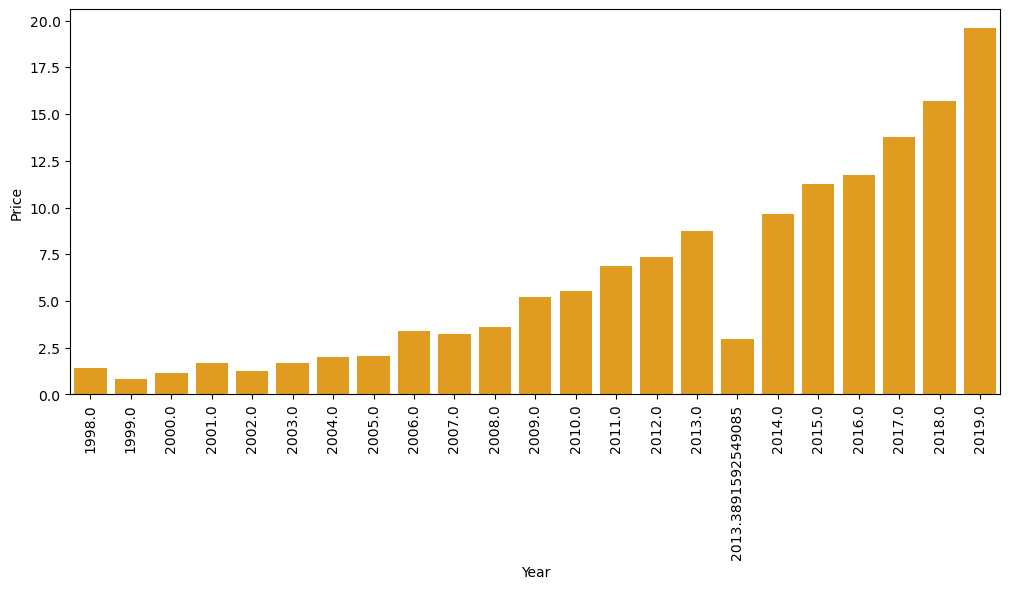

In [37]:
plt.figure(figsize=(12,5))
sns.barplot(y='Price',x='Year',data=df,ci=False,color='orange')
plt.xticks(rotation=90)
plt.show()

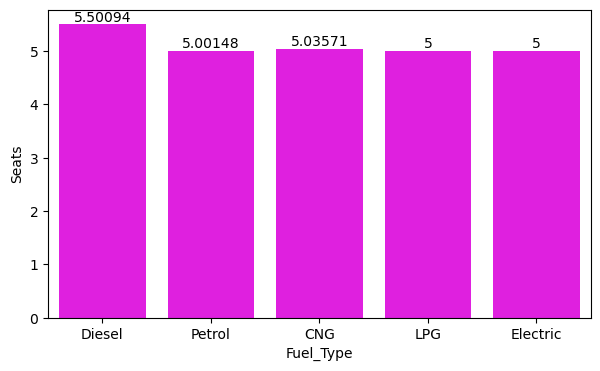

In [38]:
plt.figure(figsize=(7,4))
ax=sns.barplot(x='Fuel_Type',y='Seats',data=df,color='magenta',ci=False)
plt.bar_label(ax.containers[0])
plt.show()

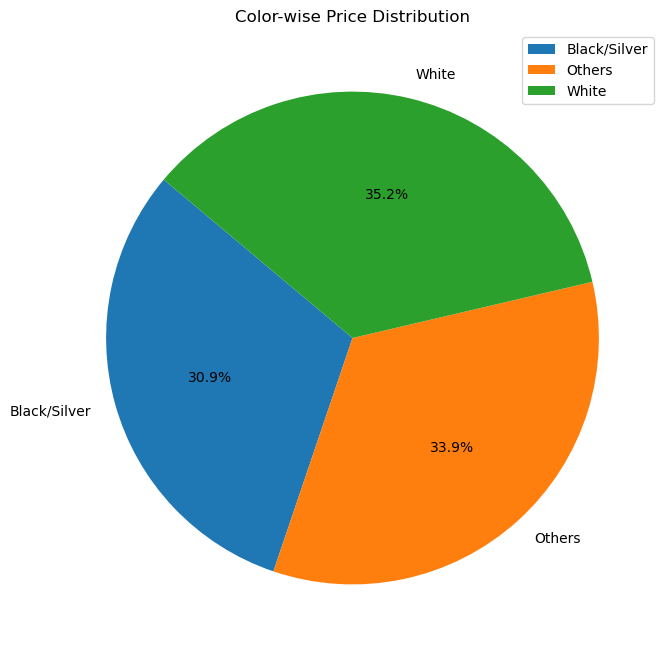

In [365]:
# Group by Colour and sum the Price
colorwise_price = df.groupby('Colour')['Price'].sum()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(colorwise_price, labels=colorwise_price.index, autopct='%1.1f%%', startangle=140)
plt.legend()
plt.title('Color-wise Price Distribution')
plt.show()

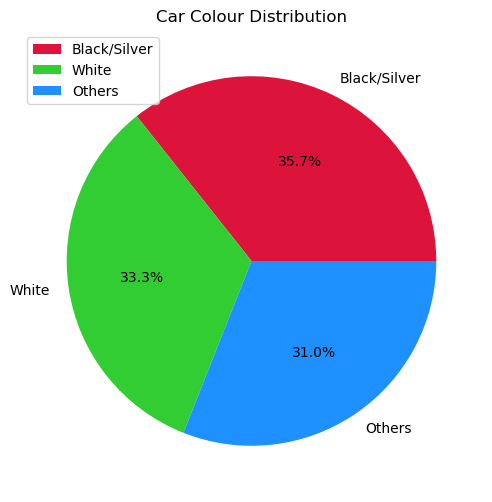

In [363]:
Car_Colour = df["Colour"].value_counts()
plt.figure(figsize=((12,6)))
Car_Colour.plot(
    kind="pie",
    autopct="%1.1f%%",
    labels=["Black/Silver","White", "Others"],
    colors = ["crimson","limegreen","dodgerblue"]
)
plt.legend(loc='upper left')
plt.title("Car Colour Distribution")
plt.ylabel("") 
plt.show()

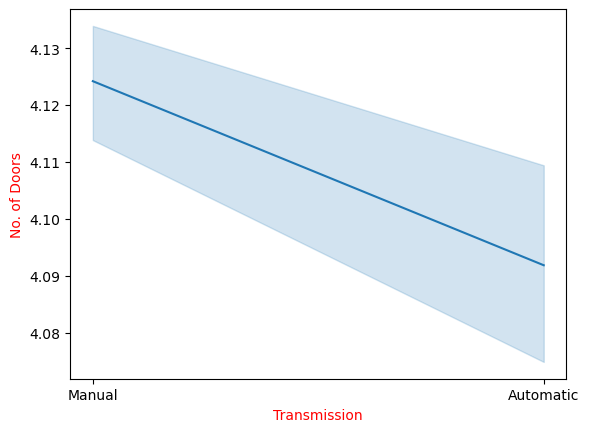

In [40]:
sns.lineplot(x='Transmission',y='No. of Doors',data=df)
plt.xlabel('Transmission',color='r')
plt.ylabel('No. of Doors',color='r')
plt.show()

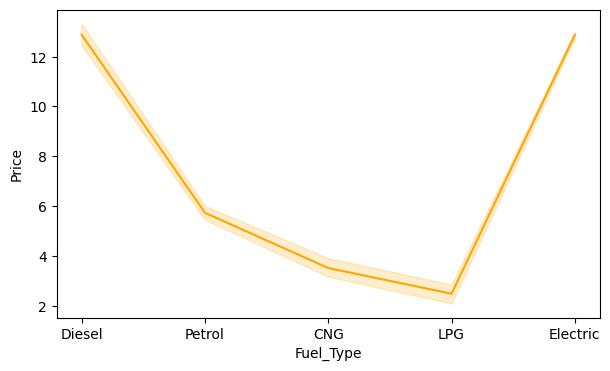

In [41]:
plt.figure(figsize=(7,4))
sns.lineplot(x='Fuel_Type',y='Price',data=df,color='orange')
plt.show()

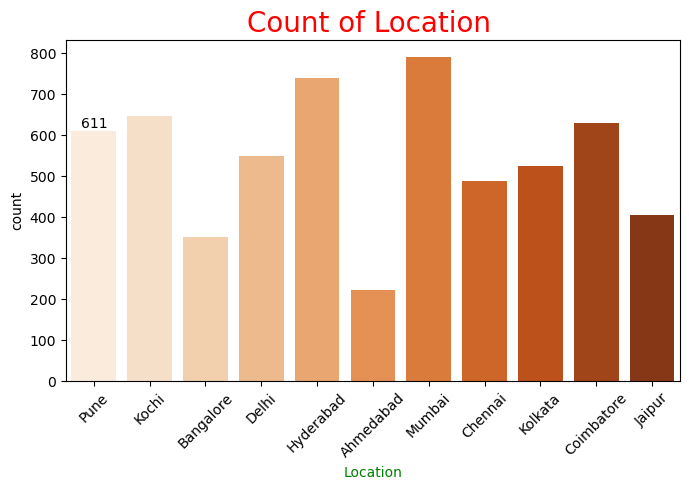

In [42]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x = "Location",data=df,palette="Oranges")
plt.bar_label(ax.containers[0])
plt.title("Count of Location ",color='r',fontsize=20)
plt.xticks(rotation=45)
plt.xlabel("Location",color='g')
plt.tight_layout()
plt.show()

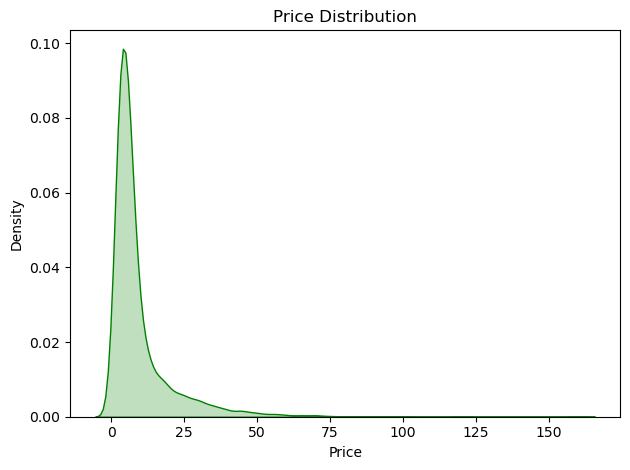

In [43]:
sns.kdeplot(x = df["Price"],fill=True,color="green")
plt.title("Price Distribution")
plt.tight_layout()
plt.show()

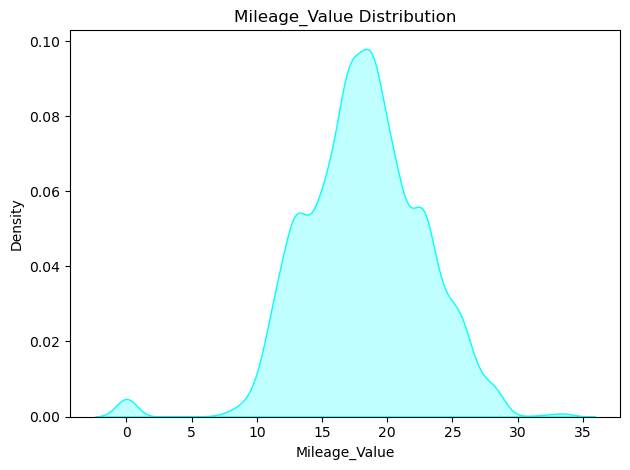

In [44]:
sns.kdeplot(x = df["Mileage_Value"],fill=True,color="aqua")
plt.title("Mileage_Value Distribution")
plt.tight_layout()
plt.show()

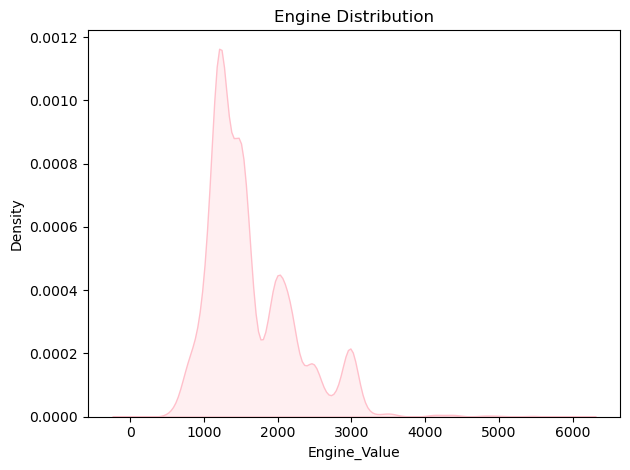

In [45]:
sns.kdeplot(x = df["Engine_Value"],fill=True,color="pink")
plt.title("Engine Distribution")
plt.tight_layout()
plt.show()

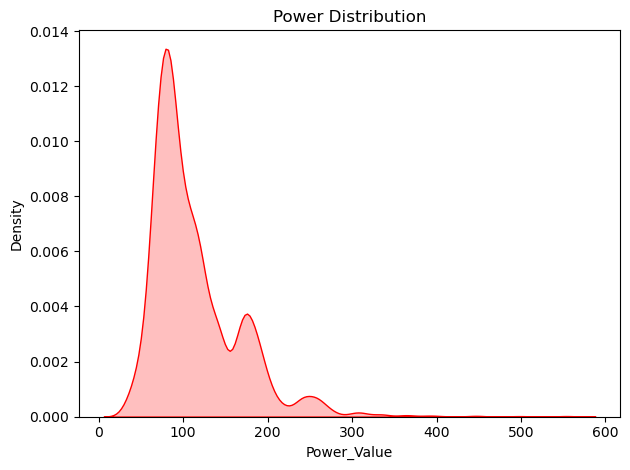

In [46]:
sns.kdeplot(x = df["Power_Value"],fill=True,color="r")
plt.title("Power Distribution")
plt.tight_layout()
plt.show()

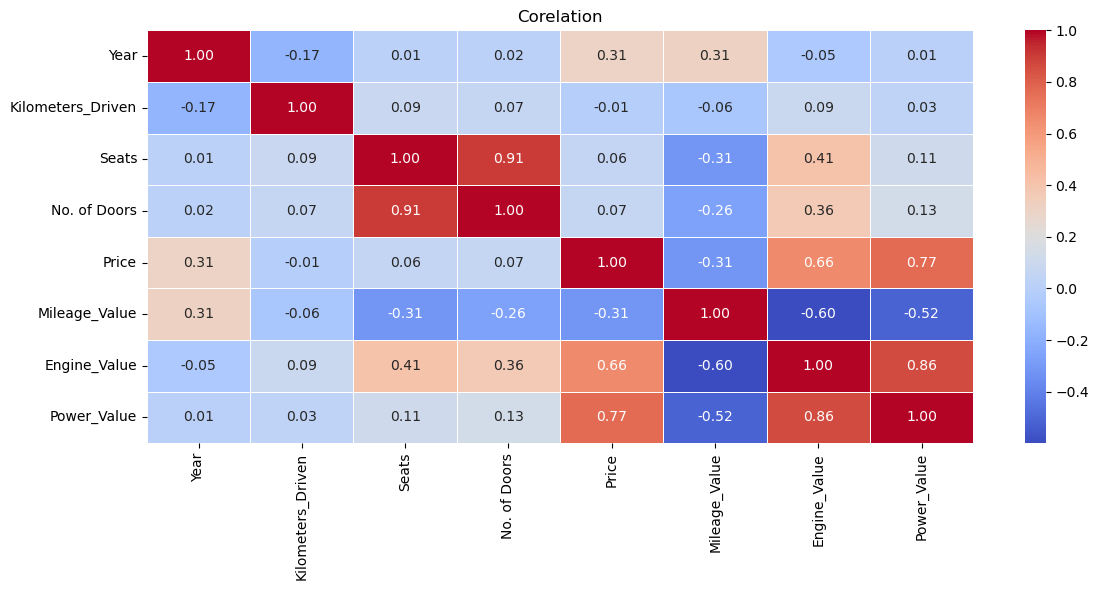

In [110]:
plt.figure(figsize=((12,6)))
sns.heatmap(data=numeric_df.corr(),annot=True,cmap="coolwarm",fmt=".2f", linewidths=0.5)
plt.title("Corelation")
plt.tight_layout()
plt.show()

In [112]:
df.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Colour,Seats,No. of Doors,Price,Mileage_Value,Mileage_Unit,Engine_Value,Engine_Unit,Power_Value,Power_Unit
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,Black/Silver,8.0,5.0,6.00,12.05,kmpl,2179.0,CC,120.0,bhp
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,Others,5.0,4.0,8.32,21.10,kmpl,998.0,CC,100.0,bhp


In [114]:
df['Location'].value_counts()

Location
Mumbai        792
Hyderabad     739
Kochi         646
Coimbatore    630
Pune          611
Delhi         549
Kolkata       526
Chennai       489
Jaipur        406
Bangalore     351
Ahmedabad     222
Name: count, dtype: int64

In [120]:
df.drop(columns=['Name','Location'],inplace=True)

In [122]:
x= df.drop(columns=['Price','Mileage_Unit','Engine_Unit','Power_Unit'])

In [124]:
x.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Colour,Seats,No. of Doors,Mileage_Value,Engine_Value,Power_Value
0,2012.0,99000.0,Diesel,Manual,Third,Black/Silver,8.0,5.0,12.05,2179.0,120.0
1,2018.0,18678.0,Petrol,Manual,First,Others,5.0,4.0,21.10,998.0,100.0
2,2013.0,197000.0,Diesel,Manual,First,White,7.0,5.0,11.68,2498.0,112.0
3,2014.0,45000.0,Diesel,Manual,First,White,5.0,4.0,24.00,1120.0,70.0
4,2011.0,65000.0,Diesel,Manual,First,Others,8.0,5.0,12.80,2494.0,102.0


In [128]:
df['Colour'].value_counts()

Colour
White           2126
Others          1987
Black/Silver    1848
Name: count, dtype: int64

In [104]:
y=df['Price']

In [106]:
y.head()

0    6.00
1    8.32
2    4.00
3    3.49
4    6.40
Name: Price, dtype: float64

In [205]:
df['Price'].max()

160.0

## Encoding

In [147]:
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel      3188
Petrol      2705
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64

In [130]:
x = pd.get_dummies(x, columns=['Fuel_Type','Transmission','Owner_Type','Colour'],dtype=int )

In [132]:
x.head()

,Year,Kilometers_Driven,Seats,No. of Doors,Mileage_Value,Engine_Value,Power_Value,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,...,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Colour_Black/Silver,Colour_Others,Colour_White
0,2012.0,99000.0,8.0,5.0,12.05,2179.0,120.0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
1,2018.0,18678.0,5.0,4.0,21.10,998.0,100.0,0,0,0,...,1,0,1,1,0,0,0,0,1,0
2,2013.0,197000.0,7.0,5.0,11.68,2498.0,112.0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
3,2014.0,45000.0,5.0,4.0,24.00,1120.0,70.0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
4,2011.0,65000.0,8.0,5.0,12.80,2494.0,102.0,0,1,0,...,0,0,1,1,0,0,0,0,1,0


In [135]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2,random_state=42)

In [168]:
X_train.shape

(4768, 21)

In [170]:
X_test.shape

(1193, 21)

In [172]:
y_train.shape

(4768,)

In [174]:
y_test.shape

(1193,)

In [186]:
from sklearn.linear_model import LinearRegression

In [188]:
model=LinearRegression()

In [190]:
model.fit(X_train,y_train)

LinearRegression()

In [192]:
y_pred=model.predict(X_test)

In [194]:
y_pred

array([ 8.08957048, 29.5550175 ,  5.46803608, ..., 20.38815251,
       -1.98079061,  8.06718913])

In [196]:
y_pred.shape

(1193,)

In [297]:
sc=model.score(X_train, y_train)
sc

0.7153759153893244

In [200]:
model.predict([[2024,98000,4,4,13.04,2167.00,130.00,0,0,0,0,1,0,1,1,0,0,0,1,0,0]])

array([23.65041354])

In [208]:
from sklearn.metrics import mean_squared_error, r2_score

In [212]:
# Calculate Mean Squared Error and R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 38.22
R^2 Score: 67.14


In [305]:
from sklearn.tree import DecisionTreeRegressor

In [307]:
# Create a decision tree regressor
model = DecisionTreeRegressor(random_state=0)

# Fit the regressor to the training data
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [309]:
# Predict on the test data
y_pred = model.predict(X_test)

In [311]:
y_pred

array([ 9.29, 32.  ,  6.75, ...,  7.5 ,  2.25,  8.11])

In [313]:
sc=model.score(X_train, y_train)
sc

0.9999586234069908

In [315]:
model.predict([[2024,98000,4,4,13.04,2167.00,130.00,0,0,0,0,1,0,1,1,0,0,0,1,0,0]])

array([10.91])

In [317]:
# Calculate Mean Squared Error and R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 33.12
R^2 Score: 71.53


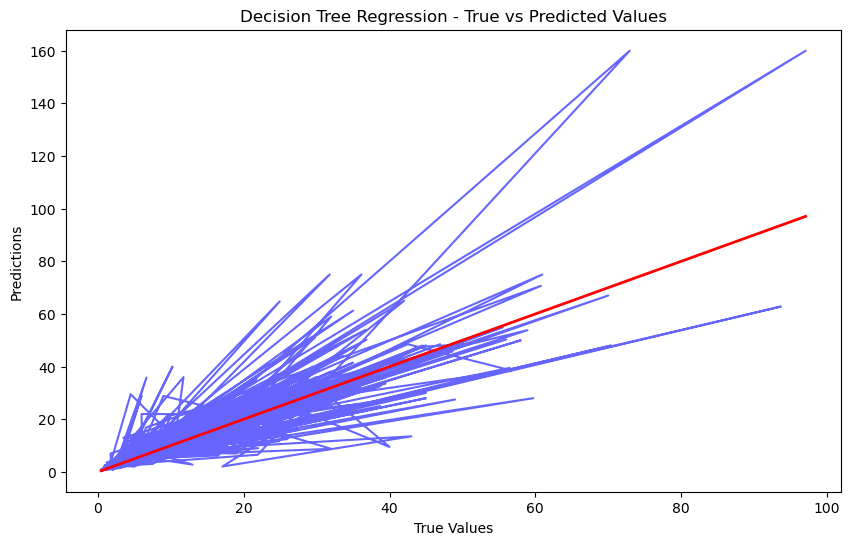

In [247]:
# Plot the true values vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],  lw=2,color='r')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Decision Tree Regression - True vs Predicted Values')
plt.show()

In [329]:
from sklearn.neighbors import KNeighborsRegressor

In [331]:
# Create and train the KNN Regressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor()

In [333]:
# Predict on the test data
y_pred = model.predict(X_test)

In [335]:
y_pred

array([ 4.77 , 22.464,  5.74 , ..., 17.704,  4.41 ,  6.862])

In [337]:
sc=model.score(X_train, y_train)*100
sc

71.53759153893245

In [339]:
model.predict([[2024,98000,4,4,13.04,2167.00,130.00,0,0,0,0,1,0,1,1,0,0,0,1,0,0]])

array([7.19])

In [341]:
# Calculate Mean Squared Error and R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 52.23
R^2 Score: 55.09


In [344]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'KNN Regressor': KNeighborsRegressor()
}
# Initialize lists to store metrics
mse_scores = []
r2_scores = []
model_names = []
# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  
    
    mse = mean_squared_error(y_test, y_pred)   
    r2 = r2_score(y_test, y_pred)
    
    model_names.append(name)    
    mse_scores.append(mse)   
    r2_scores.append(r2)

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Model': model_names,    
    'Mean Squared Error (MSE)': mse_scores,    
    'R^2 Score': r2_scores
})

results

,Model,Mean Squared Error (MSE),R^2 Score
0,Linear Regression,38.224442,0.671372
1,Decision Tree Regressor,27.209705,0.766069
2,KNN Regressor,52.233444,0.550932


## Conclusion
we have applied 3 models Linear Regression , DecisionTreeRegressor and KNeighborsRegressor model 
best model for this dataset is DecisionTreeRegressor which has more accuracy score(99.99) as compared to other two models 
and infact there are less Mean Squared Error: 33.12 and average R^2 Score: 71.53